In [28]:
# initialization
import numpy as np
import random

# importing Qiskit
from qiskit import Aer
from qiskit import QuantumCircuit, transpile
from qiskit import *
from qiskit.circuit.library import *
from qiskit.providers.aer import *
import matplotlib.pyplot as plt

# import basic plot tools
from qiskit.visualization import plot_histogram

In [4]:
# set the length of the n-bit input string. 
n = 10

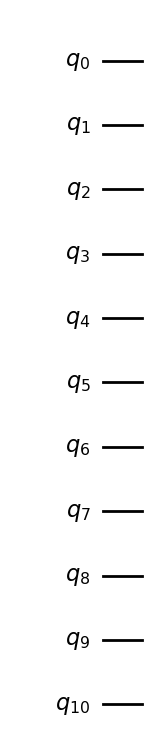

In [34]:
# set the length of the n-bit input string. 
n = 10

const_oracle = QuantumCircuit(n+1)

output = np.random.randint(2)
if output == 1:
    const_oracle.x(n)

const_oracle.draw('mpl')

In [17]:
balanced_oracle = QuantumCircuit(n+1)

In [18]:
b_str = ""
for _ in range(n):
    b_str += str(random.randint(0,1))
print(b_str)

1110000100


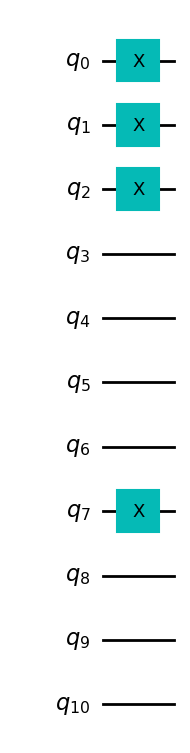

In [19]:
# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)
balanced_oracle.draw('mpl')

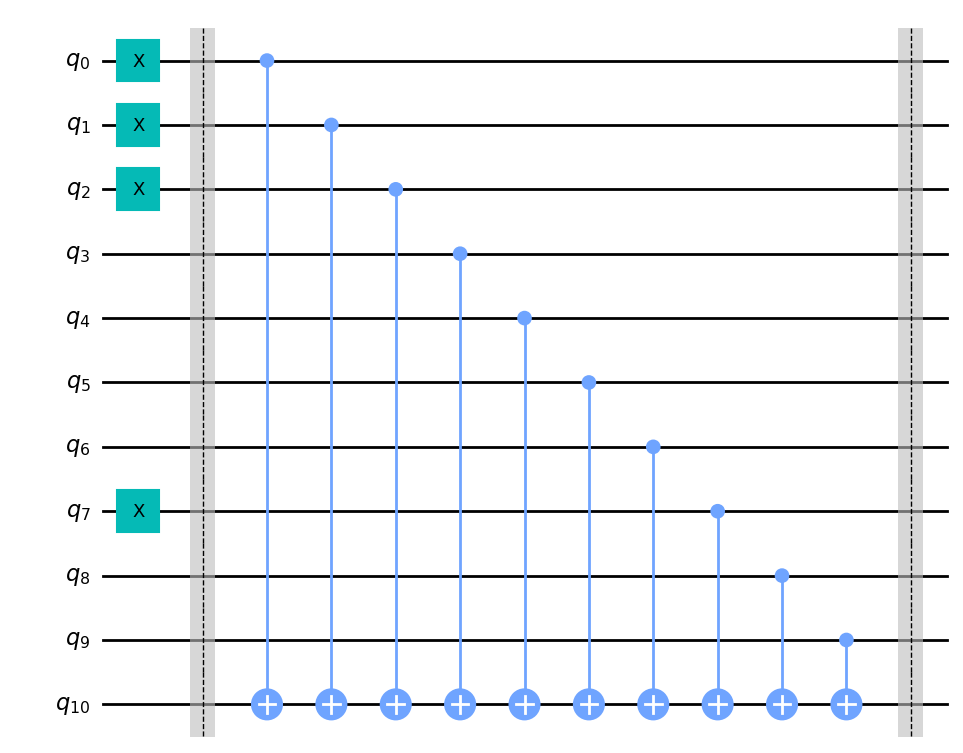

In [20]:
balanced_oracle = QuantumCircuit(n+1)

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Use barrier as divider
balanced_oracle.barrier()

# Controlled-NOT gates
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()
balanced_oracle.draw('mpl')

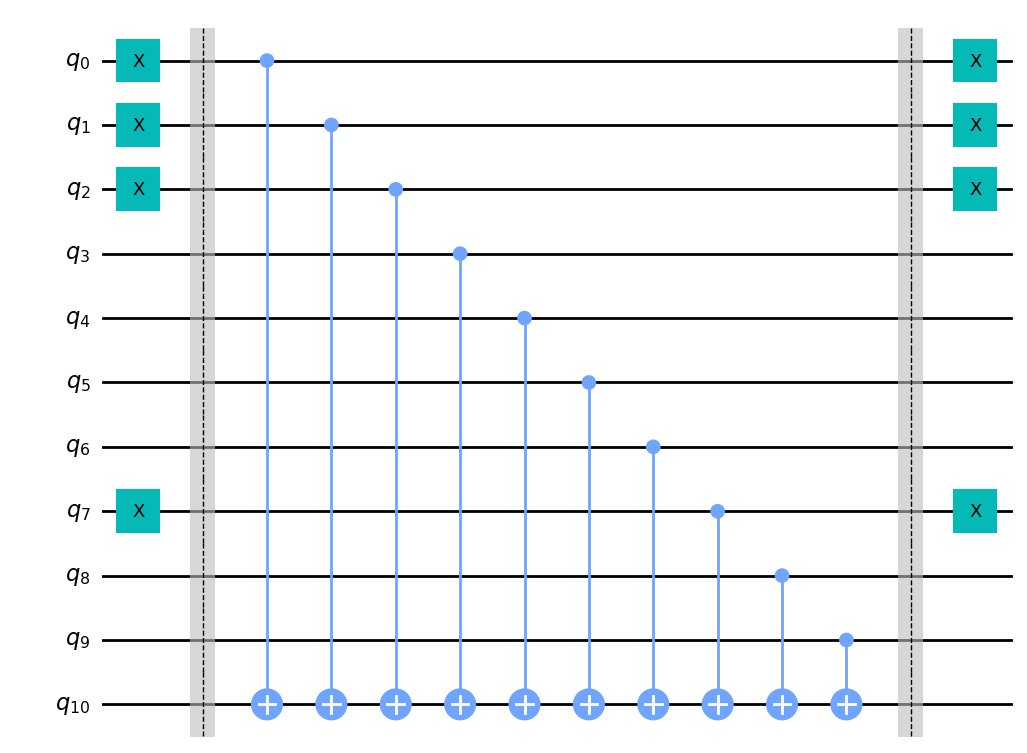

In [22]:
balanced_oracle = QuantumCircuit(n+1)

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Use barrier as divider
balanced_oracle.barrier()

# Controlled-NOT gates
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Show oracle
balanced_oracle.draw('mpl')

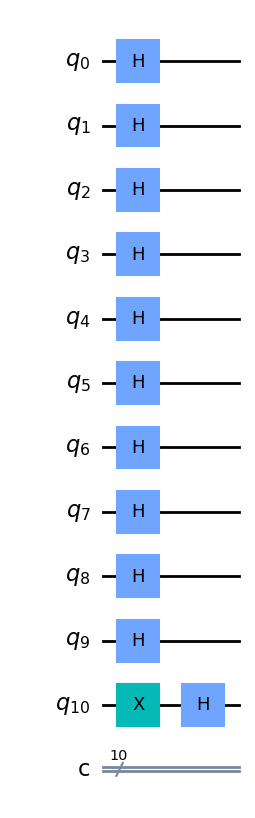

In [24]:
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)
dj_circuit.draw('mpl')

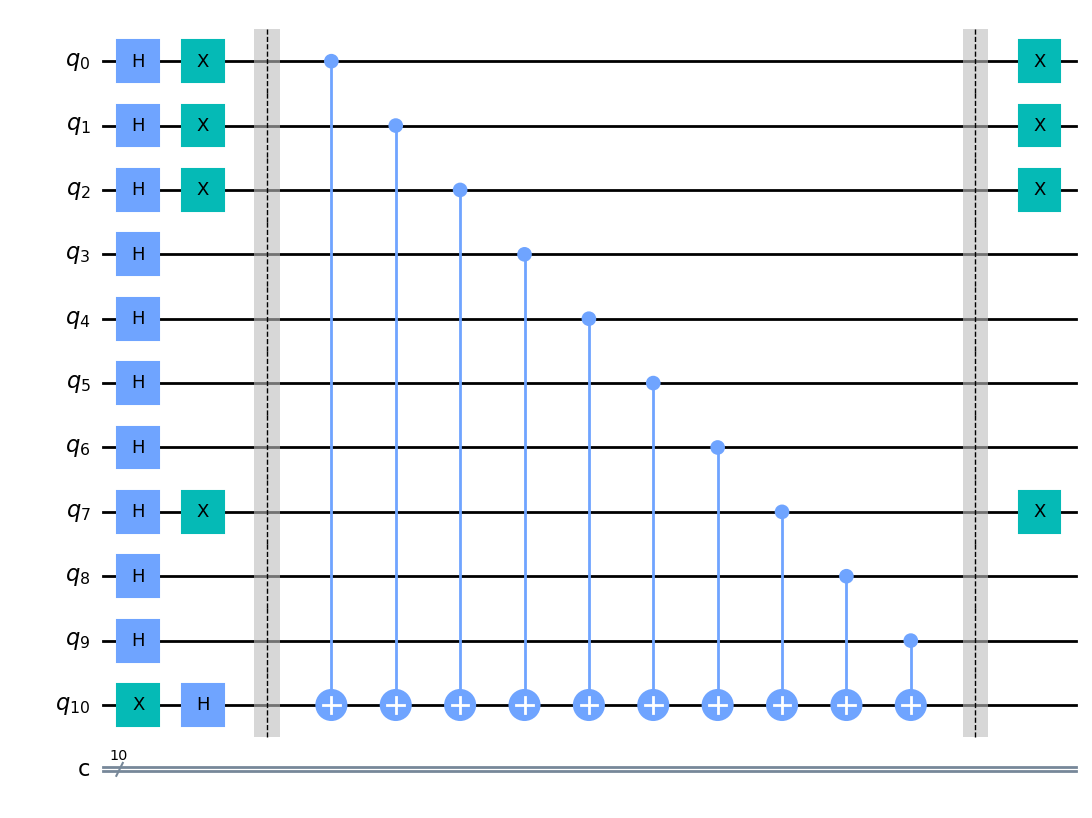

In [25]:
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)

# Add oracle
dj_circuit = dj_circuit.compose(balanced_oracle)
dj_circuit.draw('mpl')

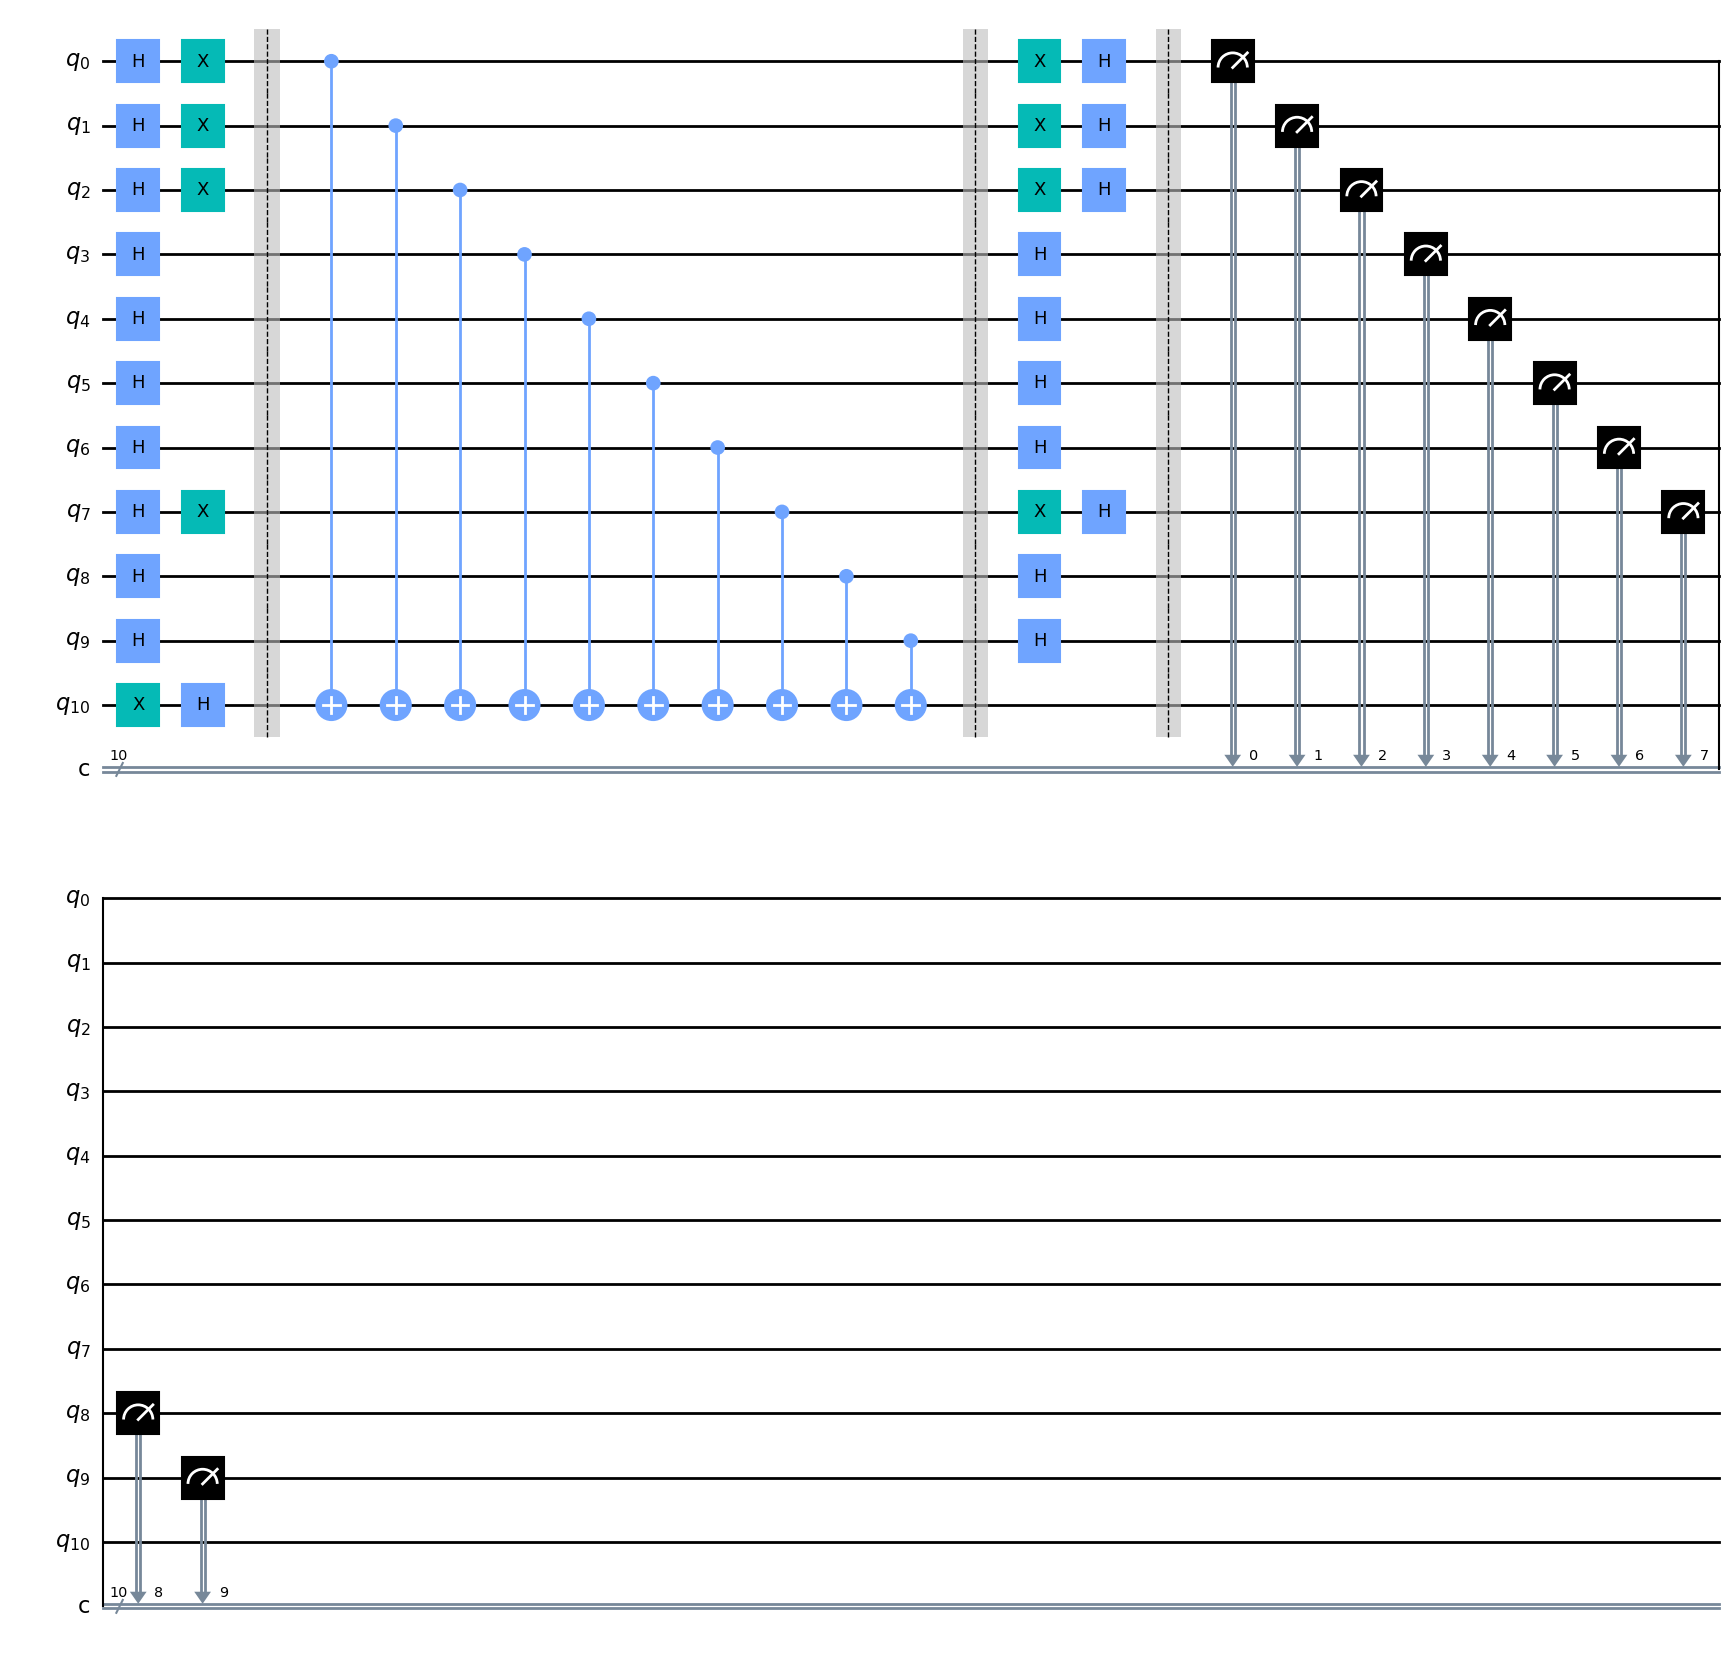

In [37]:
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)

# Add oracle
dj_circuit = dj_circuit.compose(balanced_oracle)

# Repeat H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

# Measure
for i in range(n):
    dj_circuit.measure(i, i)

# Display circuit
dj_circuit.draw('mpl')

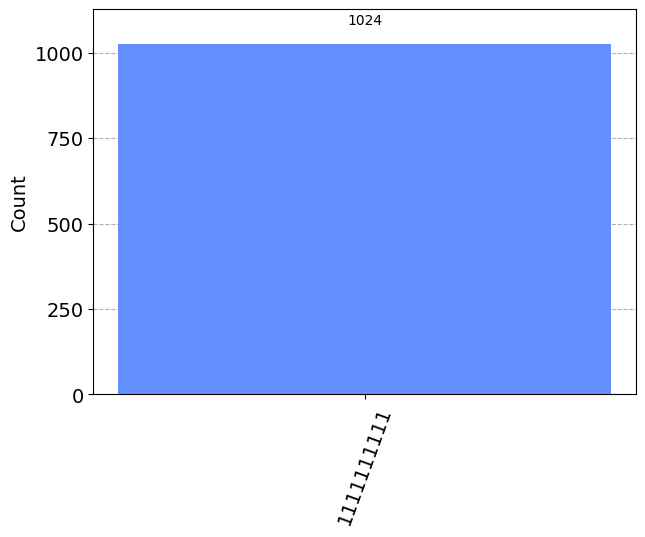

In [38]:
# use local simulator
aer_sim = AerSimulator(method='statevector', device='CPU')
results = aer_sim.run(dj_circuit).result()
answer = results.get_counts()
time = float(results.to_dict()['results'][0]['time_taken'])

plot_histogram(answer)